In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [6]:
import os
os.chdir('/content/drive/MyDrive/Task-1')

In [7]:
import pandas as pd
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

In [12]:
import pandas as pd
import random

def generate_mixed_dataset_v2(num_examples=1000):
    # English components
    locations_en = ["Paris", "New York", "London", "Tokyo", "Beijing", "Berlin", "Rome", "Delhi", "Moscow", "Sydney"]
    objects_en = ["Eiffel Tower", "Statue of Liberty", "Big Ben", "Tokyo Tower", "Great Wall of China", "Brandenburg Gate", "Colosseum", "Red Fort", "Kremlin", "Opera House"]
    facts_en = [
        "is located in",
        "is a famous landmark in",
        "is known for its cultural significance in",
        "is a historical site in"
    ]

    # Bangla components
    locations_bn = ["প্যারিস", "নিউ ইয়র্ক", "লন্ডন", "টোকিও", "বেইজিং", "বার্লিন", "রোম", "দিল্লি", "মস্কো", "সিডনি"]
    objects_bn = ["আইফেল টাওয়ার", "স্ট্যাচু অফ লিবার্টি", "বিগ বেন", "টোকিও টাওয়ার", "দ্য গ্রেট ওয়াল", "ব্রান্ডেনবার্গ গেট", "কলোসিয়াম", "লাল কেল্লা", "ক্রেমলিন", "অপেরা হাউস"]
    facts_bn = [
        "অবস্থিত",
        "একটি বিখ্যাত নিদর্শন যা অবস্থিত",
        "সংস্কৃতির জন্য পরিচিত",
        "একটি ঐতিহাসিক স্থান যা অবস্থিত"
    ]

    # Mixed language dataset
    dataset = []
    for _ in range(num_examples):
        lang = random.choice(["en", "bn"])
        if lang == "en":
            location = random.choice(locations_en)
            obj = random.choice(objects_en)
            fact = random.choice(facts_en)
            context = f"The {obj} {fact} {location}."
            question = f"Where is the {obj}?"
            answer = location
        else:
            location = random.choice(locations_bn)
            obj = random.choice(objects_bn)
            fact = random.choice(facts_bn)
            context = f"{obj} {fact} {location}।"
            question = f"{obj} কোথায় অবস্থিত?"
            answer = location

        dataset.append({
            "context": context,
            "question": question,
            "answer": answer,
            "lang": lang
        })

    return pd.DataFrame(dataset)

In [15]:
# Save to CSV for inspection (optional)
mixed_dataset.to_csv("mixed_qa_dataset.csv", index=False)

In [16]:
# Save to CSV (optional)
df.to_csv("mixed_qa_dataset.csv", index=False)

In [17]:
# Display a sample of the dataset
print("Sample Dataset:")
print(df.head())

Sample Dataset:
                                             context  \
0  লাল কেল্লা একটি পর্যটন আকর্ষণ যা অবস্থিত বার্লিন।   
1             বিগ বেন এর ইতিহাসের জন্য পরিচিত লন্ডন।   
2                    The Big Ben is located in Rome.   
3                          লাল কেল্লা অবস্থিত লন্ডন।   
4          অপেরা হাউস এর ইতিহাসের জন্য পরিচিত সিডনি।   

                       question                                     answer  \
0    লাল কেল্লা কোথায় অবস্থিত?                                    বার্লিন   
1   বিগ বেন সম্পর্কে কিছু বলুন।     বিগ বেন এর ইতিহাসের জন্য পরিচিত লন্ডন।   
2    Why is the Big Ben famous?            The Big Ben is located in Rome.   
3  লাল কেল্লা কোন শহরে অবস্থিত?                                      লন্ডন   
4          অপেরা হাউস বিশেষ কী?  অপেরা হাউস এর ইতিহাসের জন্য পরিচিত সিডনি।   

  lang  
0   bn  
1   bn  
2   en  
3   bn  
4   bn  


In [22]:
# Prepare the dataset for training and testing
df['text'] = df['question'] + " " + df['context']
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [23]:
# Step 3: Vectorize text using TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_df['text'])
X_test = vectorizer.transform(test_df['text'])

In [24]:
# Train the KNN model
knn = NearestNeighbors(n_neighbors=1, metric='cosine')
knn.fit(X_train)

NearestNeighbors(metric='cosine', n_neighbors=1)

In [25]:
# Predict answers for test data
def answer_question(question, context):
    query = question + " " + context
    query_vec = vectorizer.transform([query])
    _, idx = knn.kneighbors(query_vec)
    return train_df.iloc[idx[0][0]]['answer']

In [26]:
# Evaluate the model on the test set
test_df['predicted_answer'] = test_df.apply(lambda row: answer_question(row['question'], row['context']), axis=1)

In [27]:
# Calculate accuracy
accuracy = accuracy_score(test_df['answer'], test_df['predicted_answer'])
precision = precision_score(test_df['answer'], test_df['predicted_answer'], average="micro")
recall = recall_score(test_df['answer'], test_df['predicted_answer'], average="micro")
f1 = f1_score(test_df['answer'], test_df['predicted_answer'], average="micro")

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.2150
Precision: 0.2150
Recall: 0.2150
F1 Score: 0.2150


In [28]:
# Classification Report
print("\nClassification Report:")
print(classification_report(test_df['answer'], test_df['predicted_answer']))


Classification Report:
                                                                     precision    recall  f1-score   support

                                                            Beijing       0.00      0.00      0.00         2
                                                             Berlin       0.00      0.00      0.00         0
                                                              Delhi       0.50      0.50      0.50         2
                                                             London       1.00      1.00      1.00         1
                                                             Moscow       1.00      0.17      0.29         6
                                                           New York       1.00      0.50      0.67         2
                                                              Paris       0.40      0.50      0.44         4
                                                               Rome       0.00      0.00      0.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

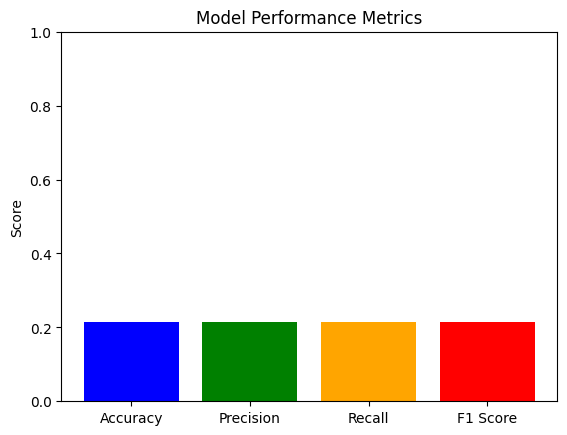

In [29]:
# Step 6: Plot Performance Metrics
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'orange', 'red'])
plt.ylabel("Score")
plt.title("Model Performance Metrics")
plt.ylim(0, 1)
plt.show()

In [30]:
# Step 7: Test the model with new queries
new_context_en = "The Eiffel Tower is a famous landmark in Paris."
new_question_en = "Where is the Eiffel Tower?"
predicted_answer_en = answer_question(new_question_en, new_context_en)
print(f"Predicted Answer (English): {predicted_answer_en}")

Predicted Answer (English): Delhi


In [31]:
new_context_bn = "আইফেল টাওয়ার একটি বিখ্যাত নিদর্শন যা অবস্থিত প্যারিস।"
new_question_bn = "আইফেল টাওয়ার কোথায় অবস্থিত?"
predicted_answer_bn = answer_question(new_question_bn, new_context_bn)
print(f"Predicted Answer (Bangla): {predicted_answer_bn}")

Predicted Answer (Bangla): আইফেল টাওয়ার একটি বিখ্যাত নিদর্শন যা অবস্থিত বার্লিন।
